In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
# # plt.style.use('seaborn-whitegrid')

In [2]:
# we read from GlobalTemperatures.csv using pandas' read_csv (comma separeted values)
# we parse as dates the values in the column 'dt' (this will be useful later)
# the method returns a DataFrame
global_temperatures = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'])
global_temperatures.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# for semplicity's sake i'm going to calculate the mean temperature for each year
# i use dataframe.groupby to which returns a 'DataFrameGroupBy' or 'SeriesGroupBy' i then apply mean() to get the mean temperatures
mean_temp_year = global_temperatures.groupby(global_temperatures.dt.dt.year).mean()

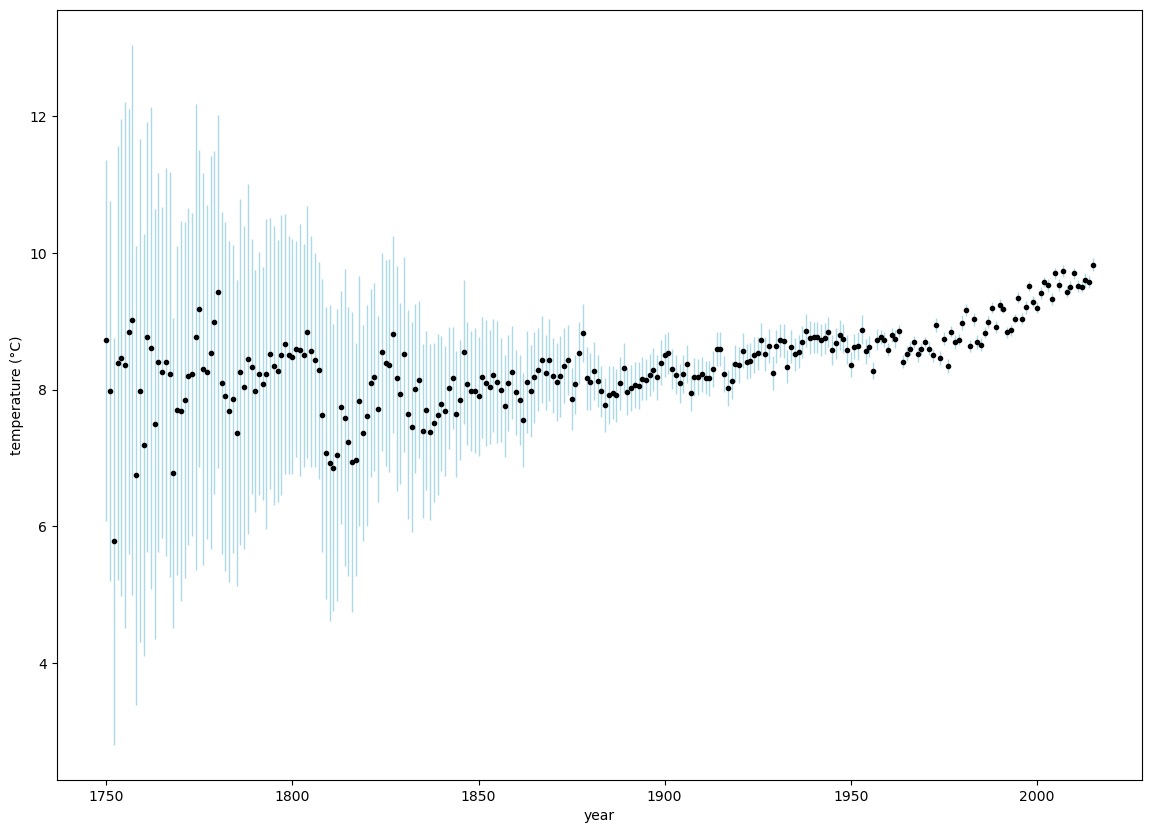

In [4]:
# making plot bigger
plt.rcParams['figure.figsize'] = [14, 10]

# showing averages and respective uncertainty bars
plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, yerr=mean_temp_year.LandAverageTemperatureUncertainty, 
             fmt='.', color='black', ecolor='lightblue', elinewidth=1)
plt.show()

In [5]:
# i want lists to easily package the data for scikit learn
temperatures = list(mean_temp_year.LandAverageTemperature)
years = list(mean_temp_year.index)

x_train = []
y_train = temperatures
for y in years:
    x_train.append([y]) # fit wants a list of lists so i make one with the years values.

reg = linear_model.Ridge(alpha=1) # i'll try first with alpha 1, we'll see later how changing alpha changes the result
reg.fit(x_train, y_train) # i'm training and predicting on the entire set for now
prediction = reg.predict(x_train)

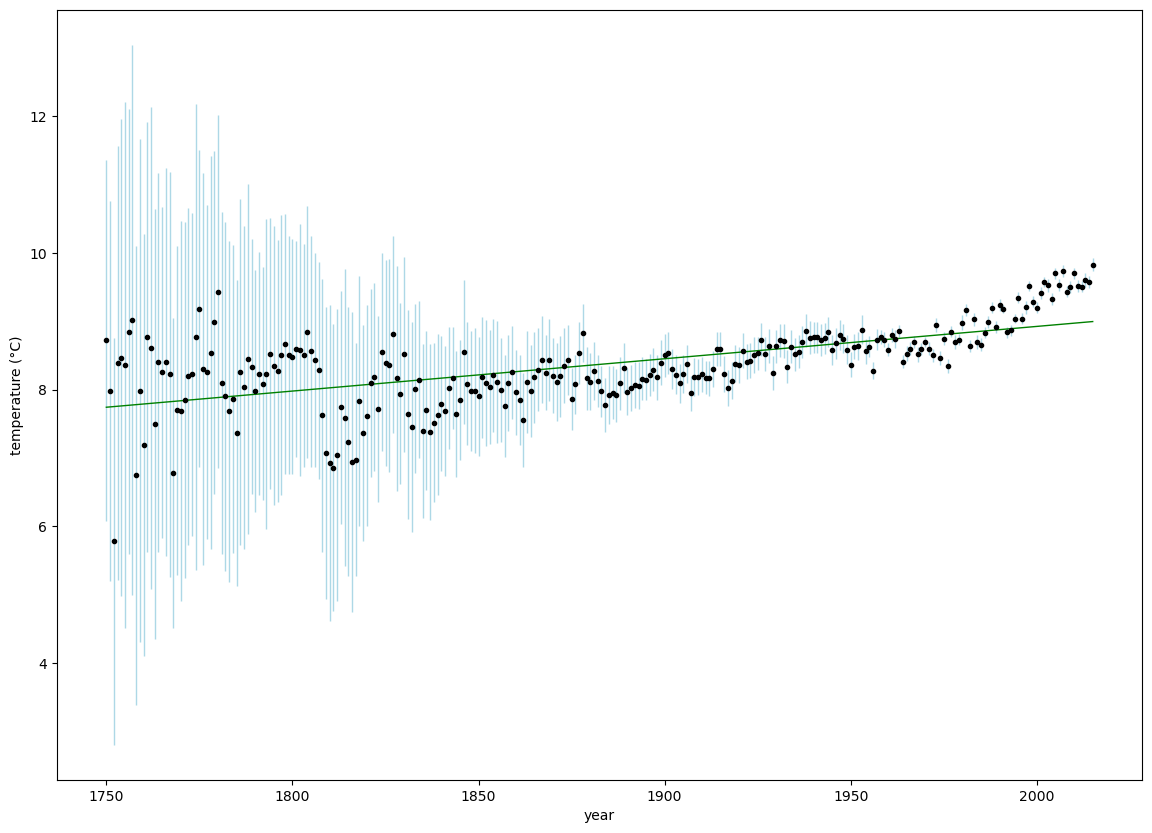

In [6]:
plt.xlabel('year')
plt.ylabel('temperature (°C)')

plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, yerr=mean_temp_year.LandAverageTemperatureUncertainty, fmt='.', color='black', ecolor='lightblue', elinewidth=1)
plt.plot(x_train, prediction, color='green', linewidth='1')
plt.show()

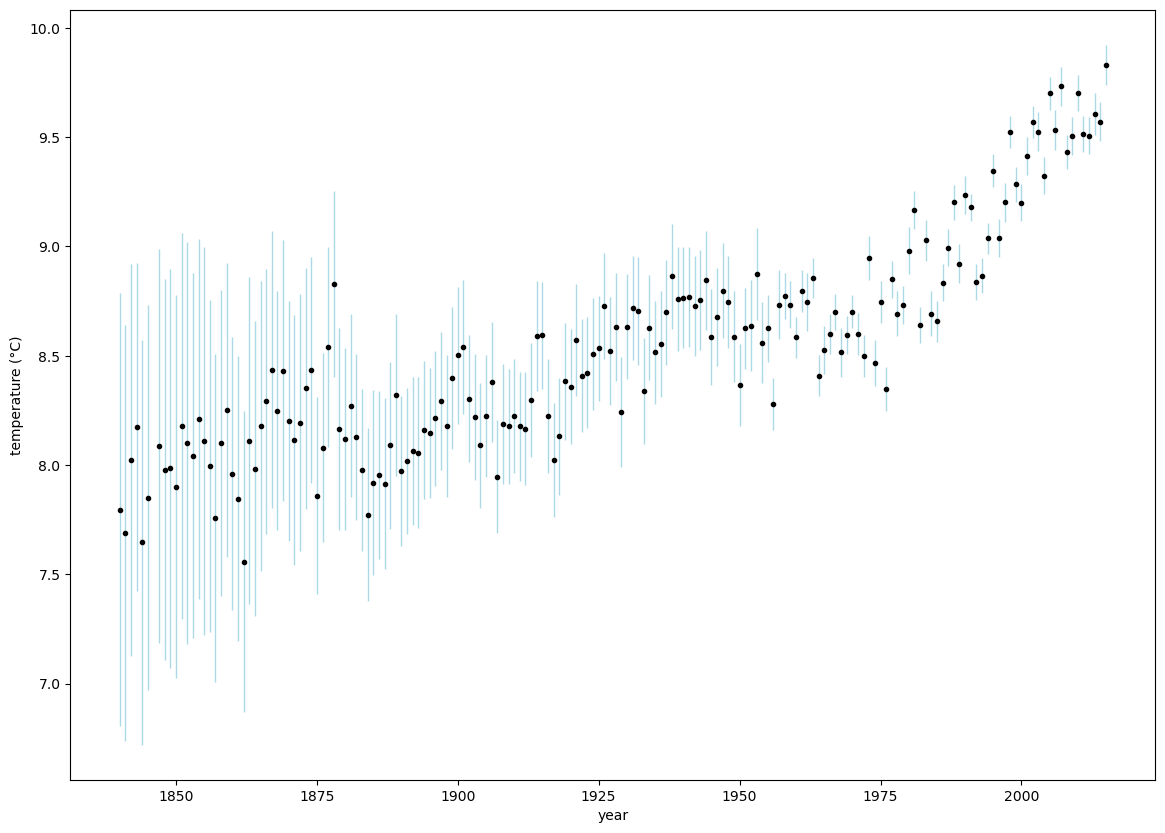

In [7]:
# i filter out entries with uncertainty > 1 degree celsius
mean_temp_year = mean_temp_year[mean_temp_year.LandAverageTemperatureUncertainty <= 1]

plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, yerr=mean_temp_year.LandAverageTemperatureUncertainty, fmt='.', color='black', ecolor='lightblue', elinewidth=1)
plt.show()

In [8]:
# same as before
temperatures = list(mean_temp_year.LandAverageTemperature)
years = list(mean_temp_year.index)

x_train = []
y_train = temperatures
for y in years:
    x_train.append([y])

reg = linear_model.Ridge(alpha=1)
reg.fit(x_train, y_train)
prediction = reg.predict(x_train)

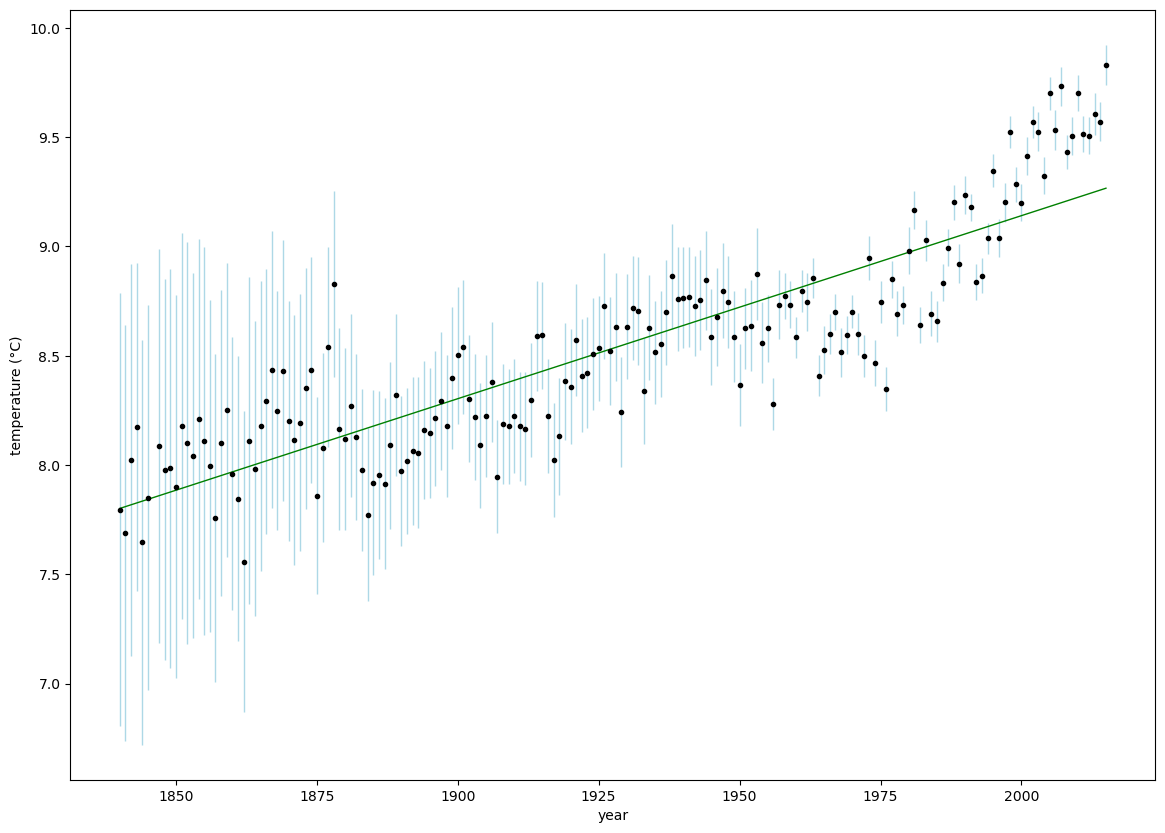

In [9]:
plt.xlabel('year')
plt.ylabel('temperature (°C)')
plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, yerr=mean_temp_year.LandAverageTemperatureUncertainty, fmt='.', color='black', ecolor='lightblue', elinewidth=1)
plt.plot(x_train, prediction, color='green', linewidth='1')
plt.show()

In [10]:
temperatures = list(mean_temp_year.LandAverageTemperature)
years = list(mean_temp_year.index)

x_train = []
y_train = temperatures
for y in years:
    x_train.append([y])

# lets try with alpha = 0
reg = linear_model.Ridge(alpha=0)
reg.fit(x_train, y_train)
prediction = reg.predict(x_train)

# lets try with alpha = 50.000
reg2 = linear_model.Ridge(alpha=50000)
reg2.fit(x_train, y_train)
prediction2 = reg2.predict(x_train)

# lets try with alpha = 500.000
reg3 = linear_model.Ridge(alpha=500000)
reg3.fit(x_train, y_train)
prediction3 = reg3.predict(x_train)

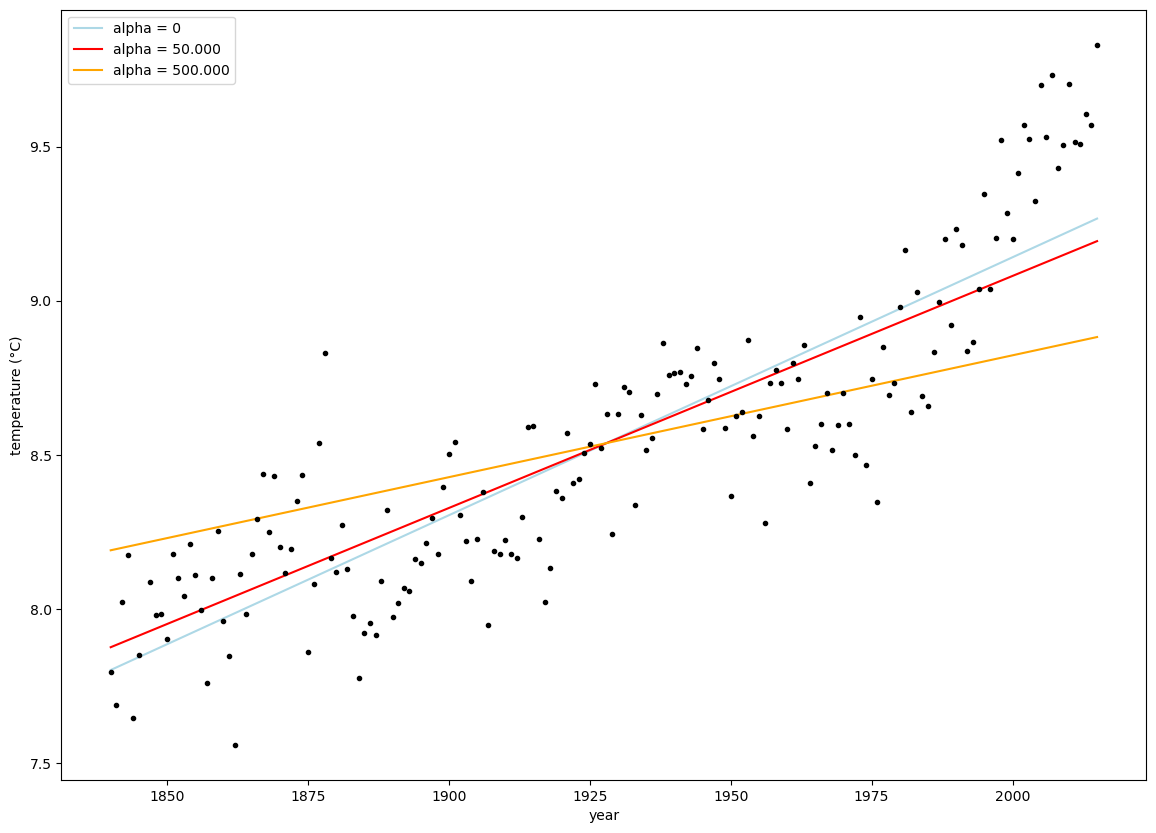

In [11]:
plt.xlabel('year')
plt.ylabel('temperature (°C)')

# plotting on the same plot the different lines
plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, fmt='.', color='black', elinewidth=1)
p = plt.plot(x_train, prediction, color='lightblue')
p2 = plt.plot(x_train, prediction2, color='red')
p3 = plt.plot(x_train, prediction3, color='orange')

plt.legend(['alpha = 0','alpha = 50.000','alpha = 500.000'], numpoints=1)
plt.show()

In [12]:
# i'll somewhat randomly devide the dataset in 2 sections, a big one and a small one
import random

temperatures = list(mean_temp_year.LandAverageTemperature)
years = list(mean_temp_year.index)

small_x = []
small_y = []
big_x =[]
big_y = []
for y, t in zip(years, temperatures):
    choice = random.randint(0,99)
    if choice <= 10: # ~ 1 in 10 will go here
        small_x.append([y])
        small_y.append(t)
    else:
        big_x.append([y])
        big_y.append(t)

# fitting the model on the small set and predicting on the big one
reg = linear_model.Ridge(alpha=0)
reg.fit(small_x, small_y)
prediction = reg.predict(big_x)
score = reg.score(small_x, small_y)

# trying a different alpha
reg2 = linear_model.Ridge(alpha=10000)
reg2.fit(small_x, small_y)
prediction2 = reg2.predict(big_x)
score2 = reg2.score(small_x, small_y)

# fitting the model on the big set and predicting on the small one
reg3 = linear_model.Ridge(alpha=0)
reg3.fit(big_x, big_y)
prediction3 = reg3.predict(small_x)
score3 = reg3.score(big_x, big_y)

# trying a different alpha
reg4 = linear_model.Ridge(alpha=10000)
reg4.fit(big_x, big_y)
prediction4 = reg4.predict(small_x)
score4 = reg4.score(big_x, big_y)

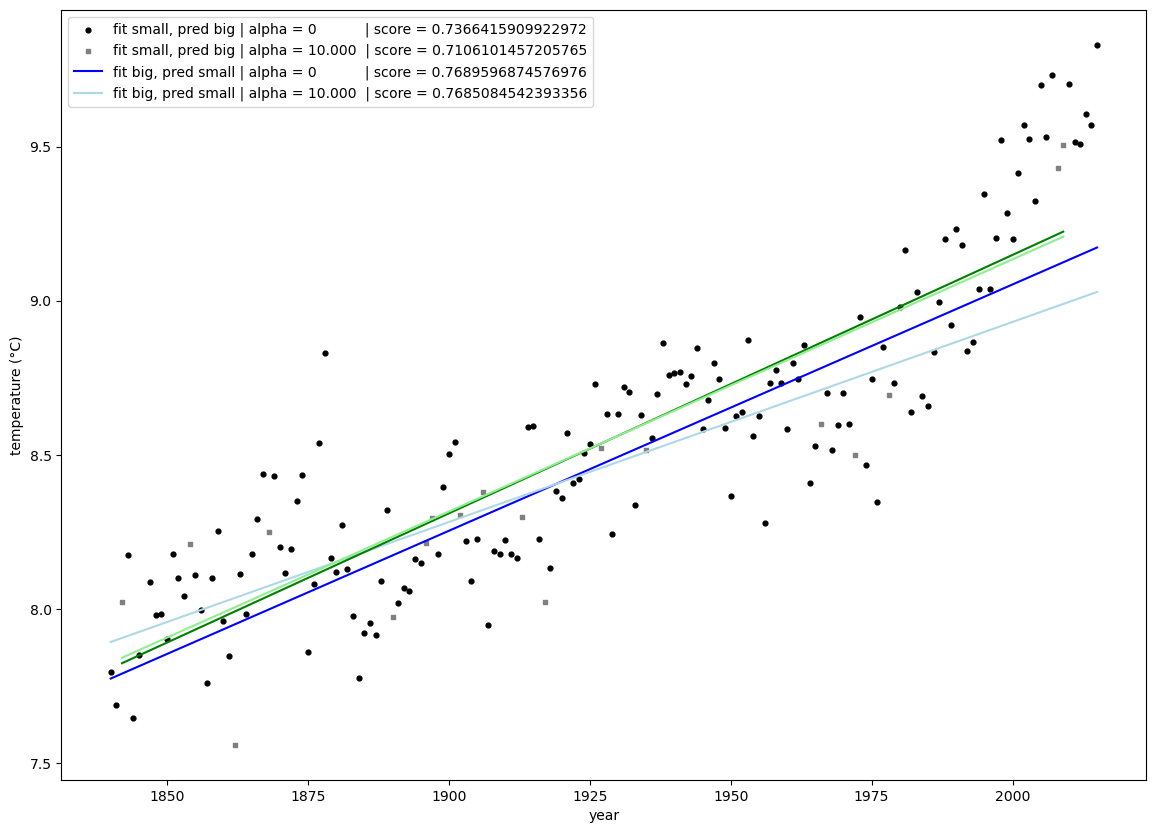

In [13]:
plt.rcParams['figure.figsize'] = [14, 10]
plt.xlabel('year')
plt.ylabel('temperature (°C)')

plt.scatter(big_x, big_y, marker='o', color='black', s=12)
plt.scatter(small_x, small_y, marker='s', color='gray', s=10)
p = plt.plot(big_x, prediction, color='blue')
p2 = plt.plot(big_x, prediction2, color='lightblue')
p3 = plt.plot(small_x, prediction3, color='green')
p4 = plt.plot(small_x, prediction4, color='lightgreen')

leg = ['fit small, pred big | alpha = 0           | score = {}'.format(score),
       'fit small, pred big | alpha = 10.000  | score = {}'.format(score2),
       'fit big, pred small | alpha = 0           | score = {}'.format(score3), 
       'fit big, pred small | alpha = 10.000  | score = {}'.format(score4)
      ]

plt.legend(leg, numpoints=1)
plt.show()

In [14]:
# same as before
temperatures = list(mean_temp_year.LandAverageTemperature)
years = list(mean_temp_year.index)

x_train = []
y_train = temperatures
for y in years:
    x_train.append([y])

alphas = [0, 1, 50]
predictions = []
for i in range(0, 3):
    model = make_pipeline(PolynomialFeatures(2), linear_model.Ridge(alpha=alphas[i]))
    model.fit(x_train, y_train)
    predictions.append(model.predict(x_train))

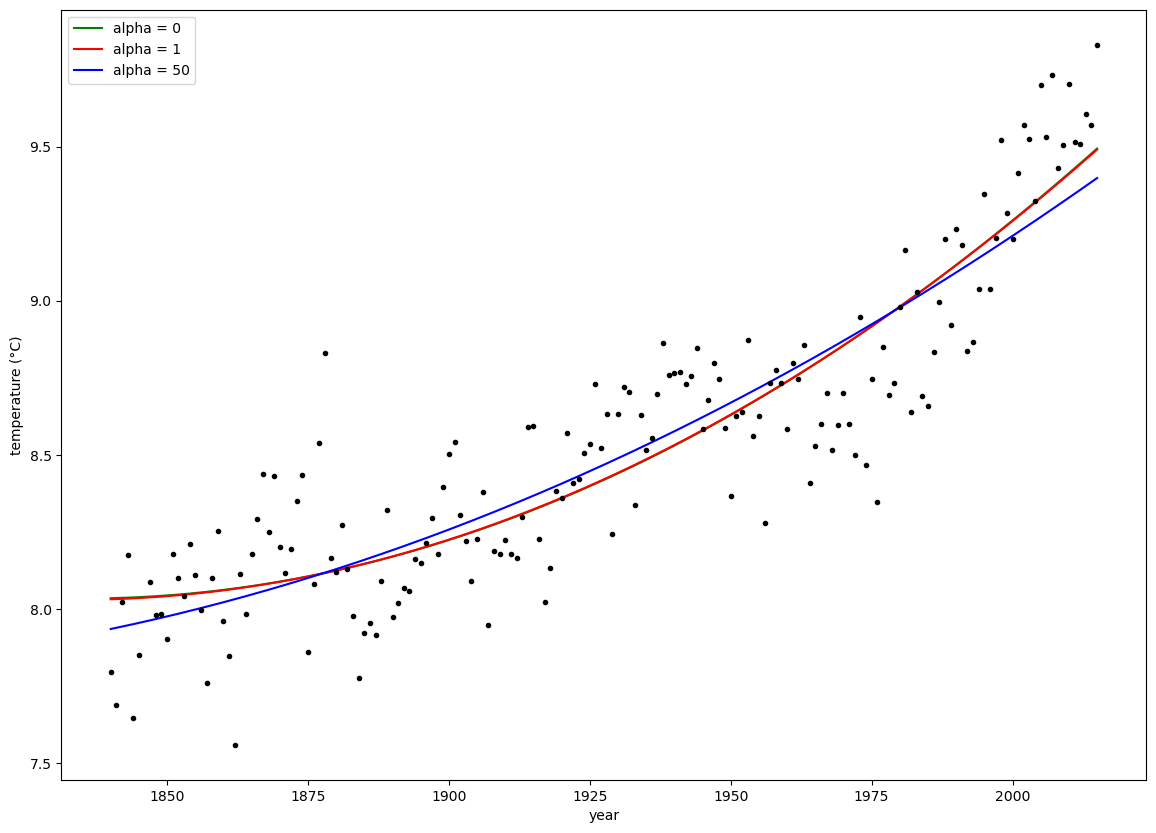

In [15]:
plt.xlabel('year')
plt.ylabel('temperature (°C)')

plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, fmt='.', color='black', elinewidth=1)
p = plt.plot(x_train, predictions[0], color='green')
p1 = plt.plot(x_train, predictions[1], color='red')
p2 = plt.plot(x_train, predictions[2], color='blue')

plt.legend(['alpha = 0','alpha = 1','alpha = 50'], numpoints=1)
plt.show()

In [16]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection


In [17]:

# same as before
temperatures = list(mean_temp_year.LandAverageTemperature)
years = list(mean_temp_year.index)

x_train = []
y_train = temperatures
for y in years:
    x_train.append([y])

degrees = [1, 2, 4]
predictions = []



for i in range(0, 3):
    model = make_pipeline(PolynomialFeatures(degrees[i]), linear_model.Ridge(alpha=1))
    model.fit(x_train, y_train)
    predictions.append(model.predict(x_train))

kfold = model_selection.KFold(n_splits=10, shuffle=False)
score_model = make_pipeline(PolynomialFeatures(4), linear_model.Ridge(alpha=1))
results = model_selection.cross_val_score(score_model, x_train, y_train, cv=kfold, scoring='r2')
print("score_model {}".format(results.mean()))

score_model -0.9004487683132648


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.70632e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.6544e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.22118e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.95367e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.p

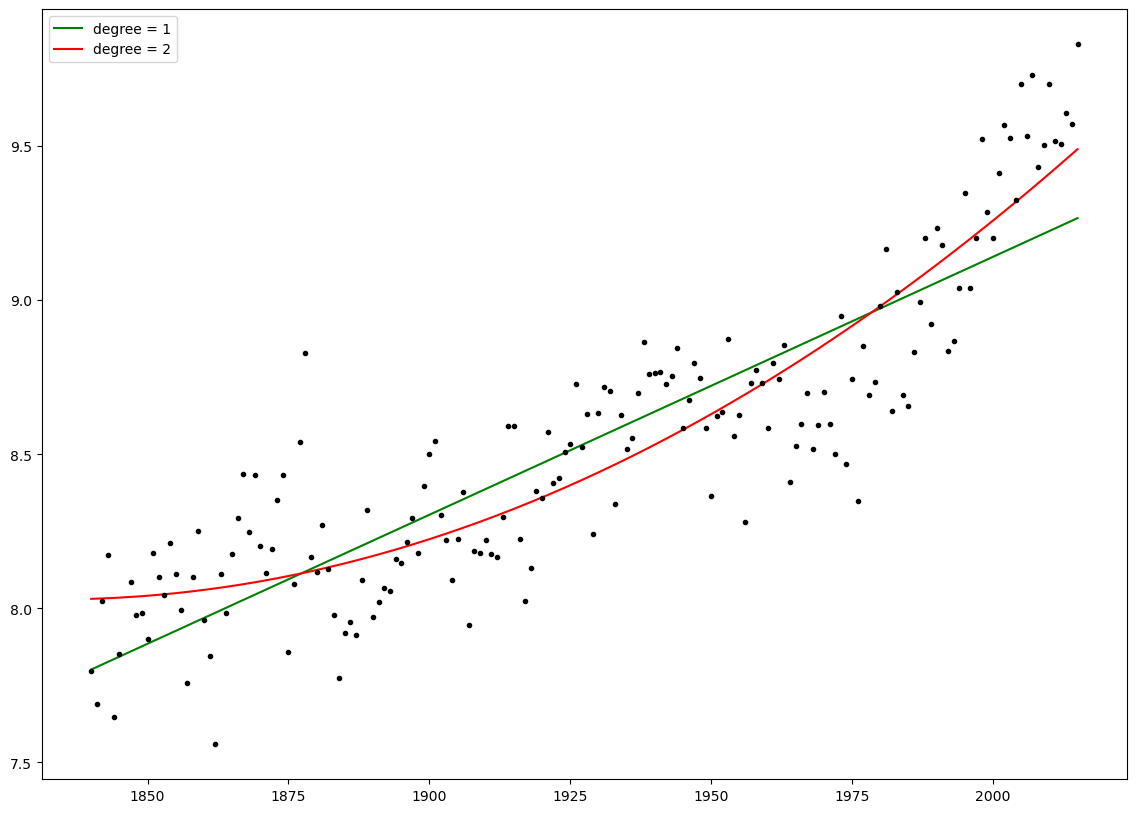

In [18]:
plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, fmt='.', color='black', elinewidth=1)
p = plt.plot(x_train, predictions[0], color='green')
p1 = plt.plot(x_train, predictions[1], color='red')


plt.legend(['degree = 1','degree = 2'], numpoints=1)
plt.show()

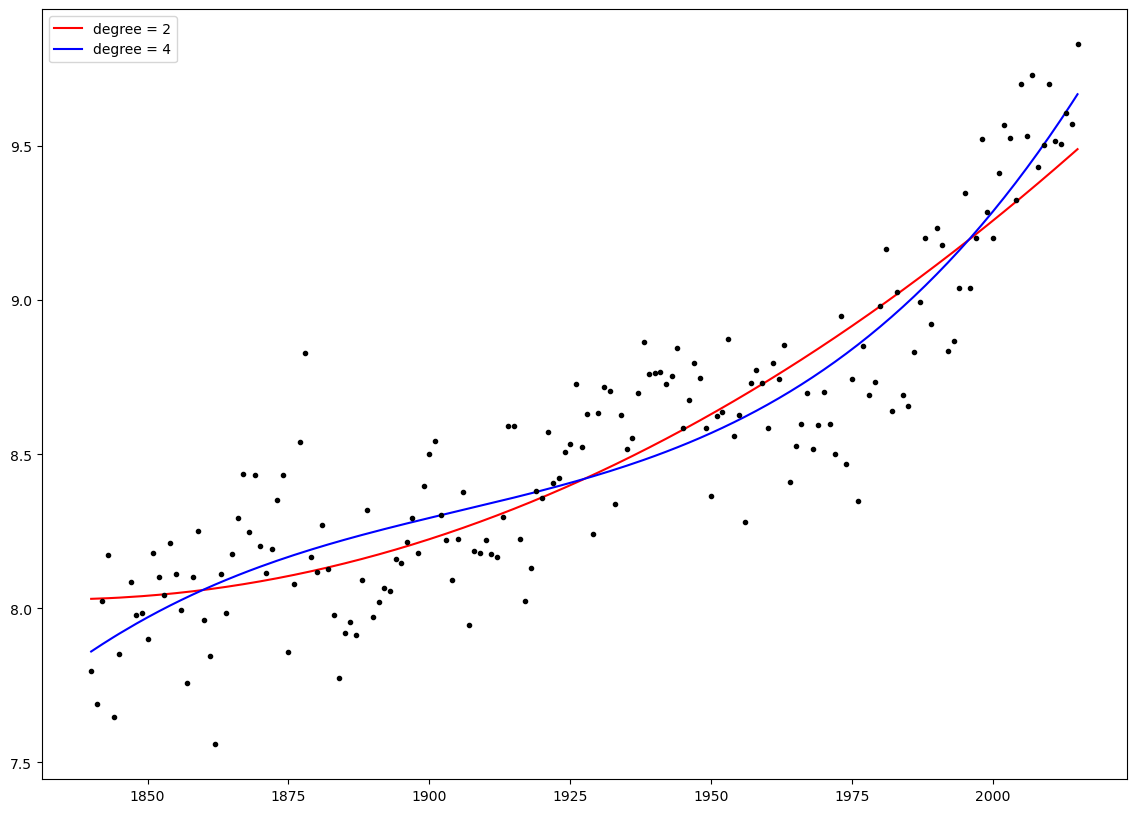

In [19]:
plt.errorbar(mean_temp_year.index, mean_temp_year.LandAverageTemperature, fmt='.', color='black', elinewidth=1)
p1 = plt.plot(x_train, predictions[1], color='red')
p2 = plt.plot(x_train, predictions[2], color='blue')

plt.legend(['degree = 2','degree = 4'], numpoints=1)
plt.show()
